In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# https://amanxai.com/2021/01/10/human-activity-recognition-with-machine-learning/

In [13]:
training_data = pd.read_csv('C:\\Siva\\Python\\MyProjects\\medium_projects_dataset\\train.csv')
testing_data = pd.read_csv('C:\\Siva\\Python\\MyProjects\\medium_projects_dataset\\test.csv')
training_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [14]:
# Get X and y for training data
X_train = training_data.drop(columns = ['Activity', 'subject'])
y_train = training_data["Activity"]

# Get X and y for testing data
y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject'])

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500.]),
 [Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500'),
  Text(0, 750.0, '750'),
  Text(0, 1000.0, '1000'),
  Text(0, 1250.0, '1250'),
  Text(0, 1500.0, '1500')])

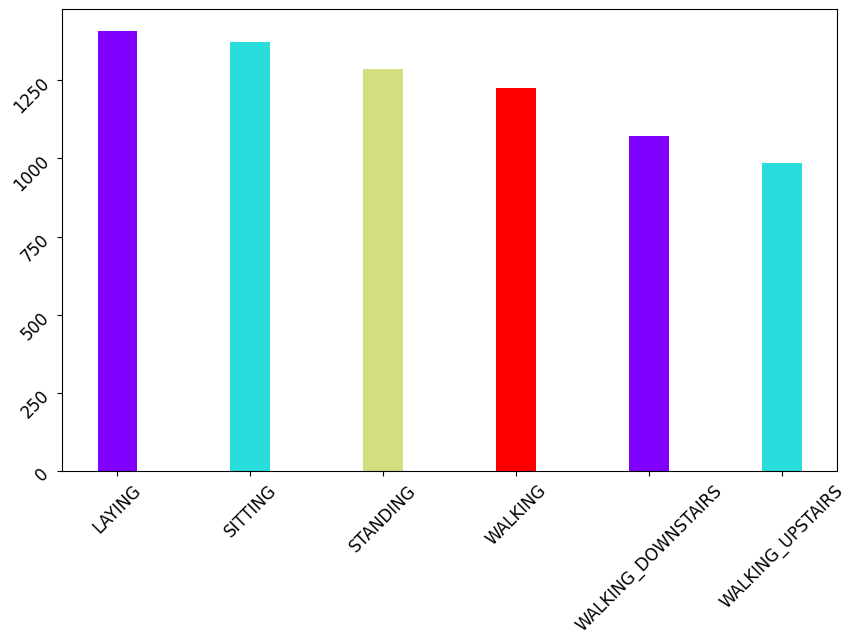

In [15]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(y_train.unique())
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(10,6))
plt.bar(activities,count_of_each_activity,width=0.3,color=colors)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(rotation=45,fontsize=12)

([<matplotlib.patches.Wedge at 0x1abea02b250>,
 [Text(0.9071064042843978, 0.6222201951931734, 'LAYING'),
  Text(-0.23874655550083318, 1.073778413936734, 'SITTING'),
  Text(-1.0745883953938618, 0.2350739893838653, 'STANDING'),
  Text(-0.7193126005997744, -0.8322195519322949, 'WALKING'),
  Text(0.2930163153248916, -1.0602553649727144, 'WALKING_DOWNSTAIRS'),
  Text(1.0038011260299566, -0.44987031395835775, 'WALKING_UPSTAIRS')],
 [Text(0.4947853114278533, 0.3393928337417309, '19.14'),
  Text(-0.13022539390954535, 0.5856973166927639, '18.69'),
  Text(-0.5861391247602882, 0.1282221760275629, '17.49'),
  Text(-0.3923523275998769, -0.45393793741761534, '16.68'),
  Text(0.1598270810863045, -0.578321108166935, '14.59'),
  Text(0.5475278869254309, -0.24538380761364964, '13.41')])

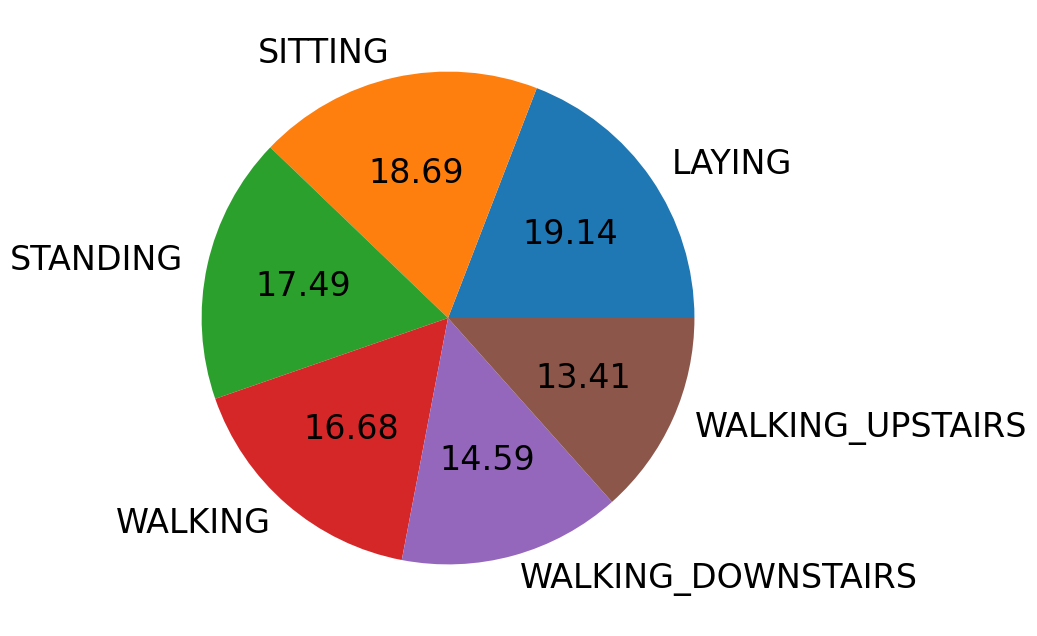

In [16]:
plt.figure(figsize=(16,8))
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

<BarContainer object of 3 artists>

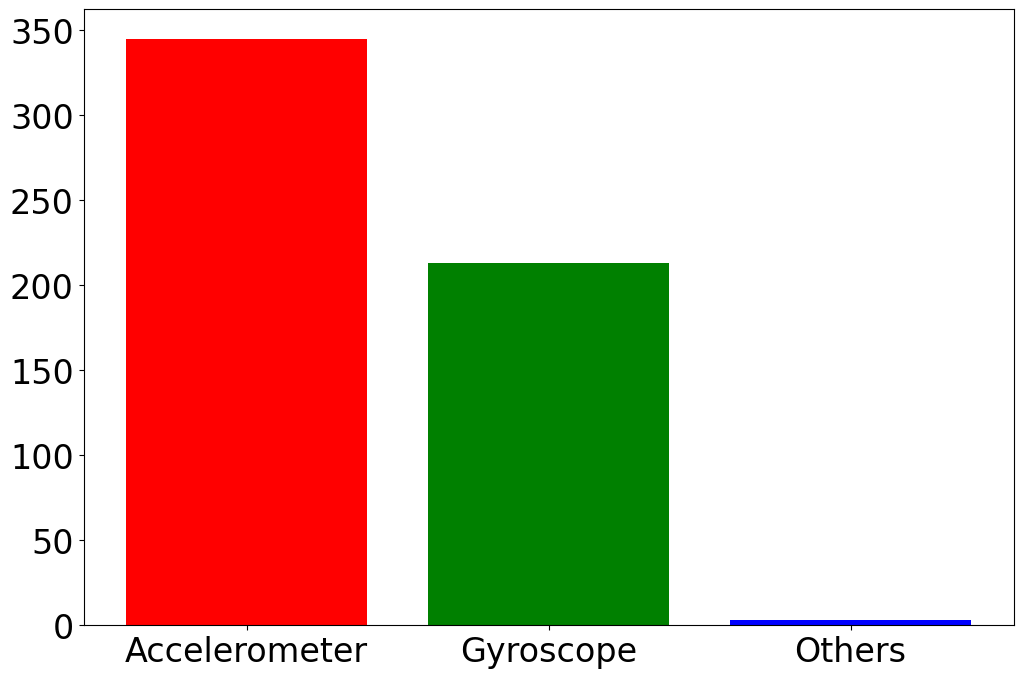

In [17]:
Acc = 0
Gyro = 0
other = 0

for value in X_train.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(12,8))
plt.bar(['Accelerometer', 'Gyroscope', 'Others'],[Acc,Gyro,other],color=('r','g','b'))

In [18]:
training_data['subject'].unique()
standing_activity = training_data[training_data['Activity'] == 'STANDING']
# Reset the index for this dataframe
standing_activity = standing_activity.reset_index(drop=True)
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])
print(time_series)

[0. 0. 0. ... 0. 0. 0.]


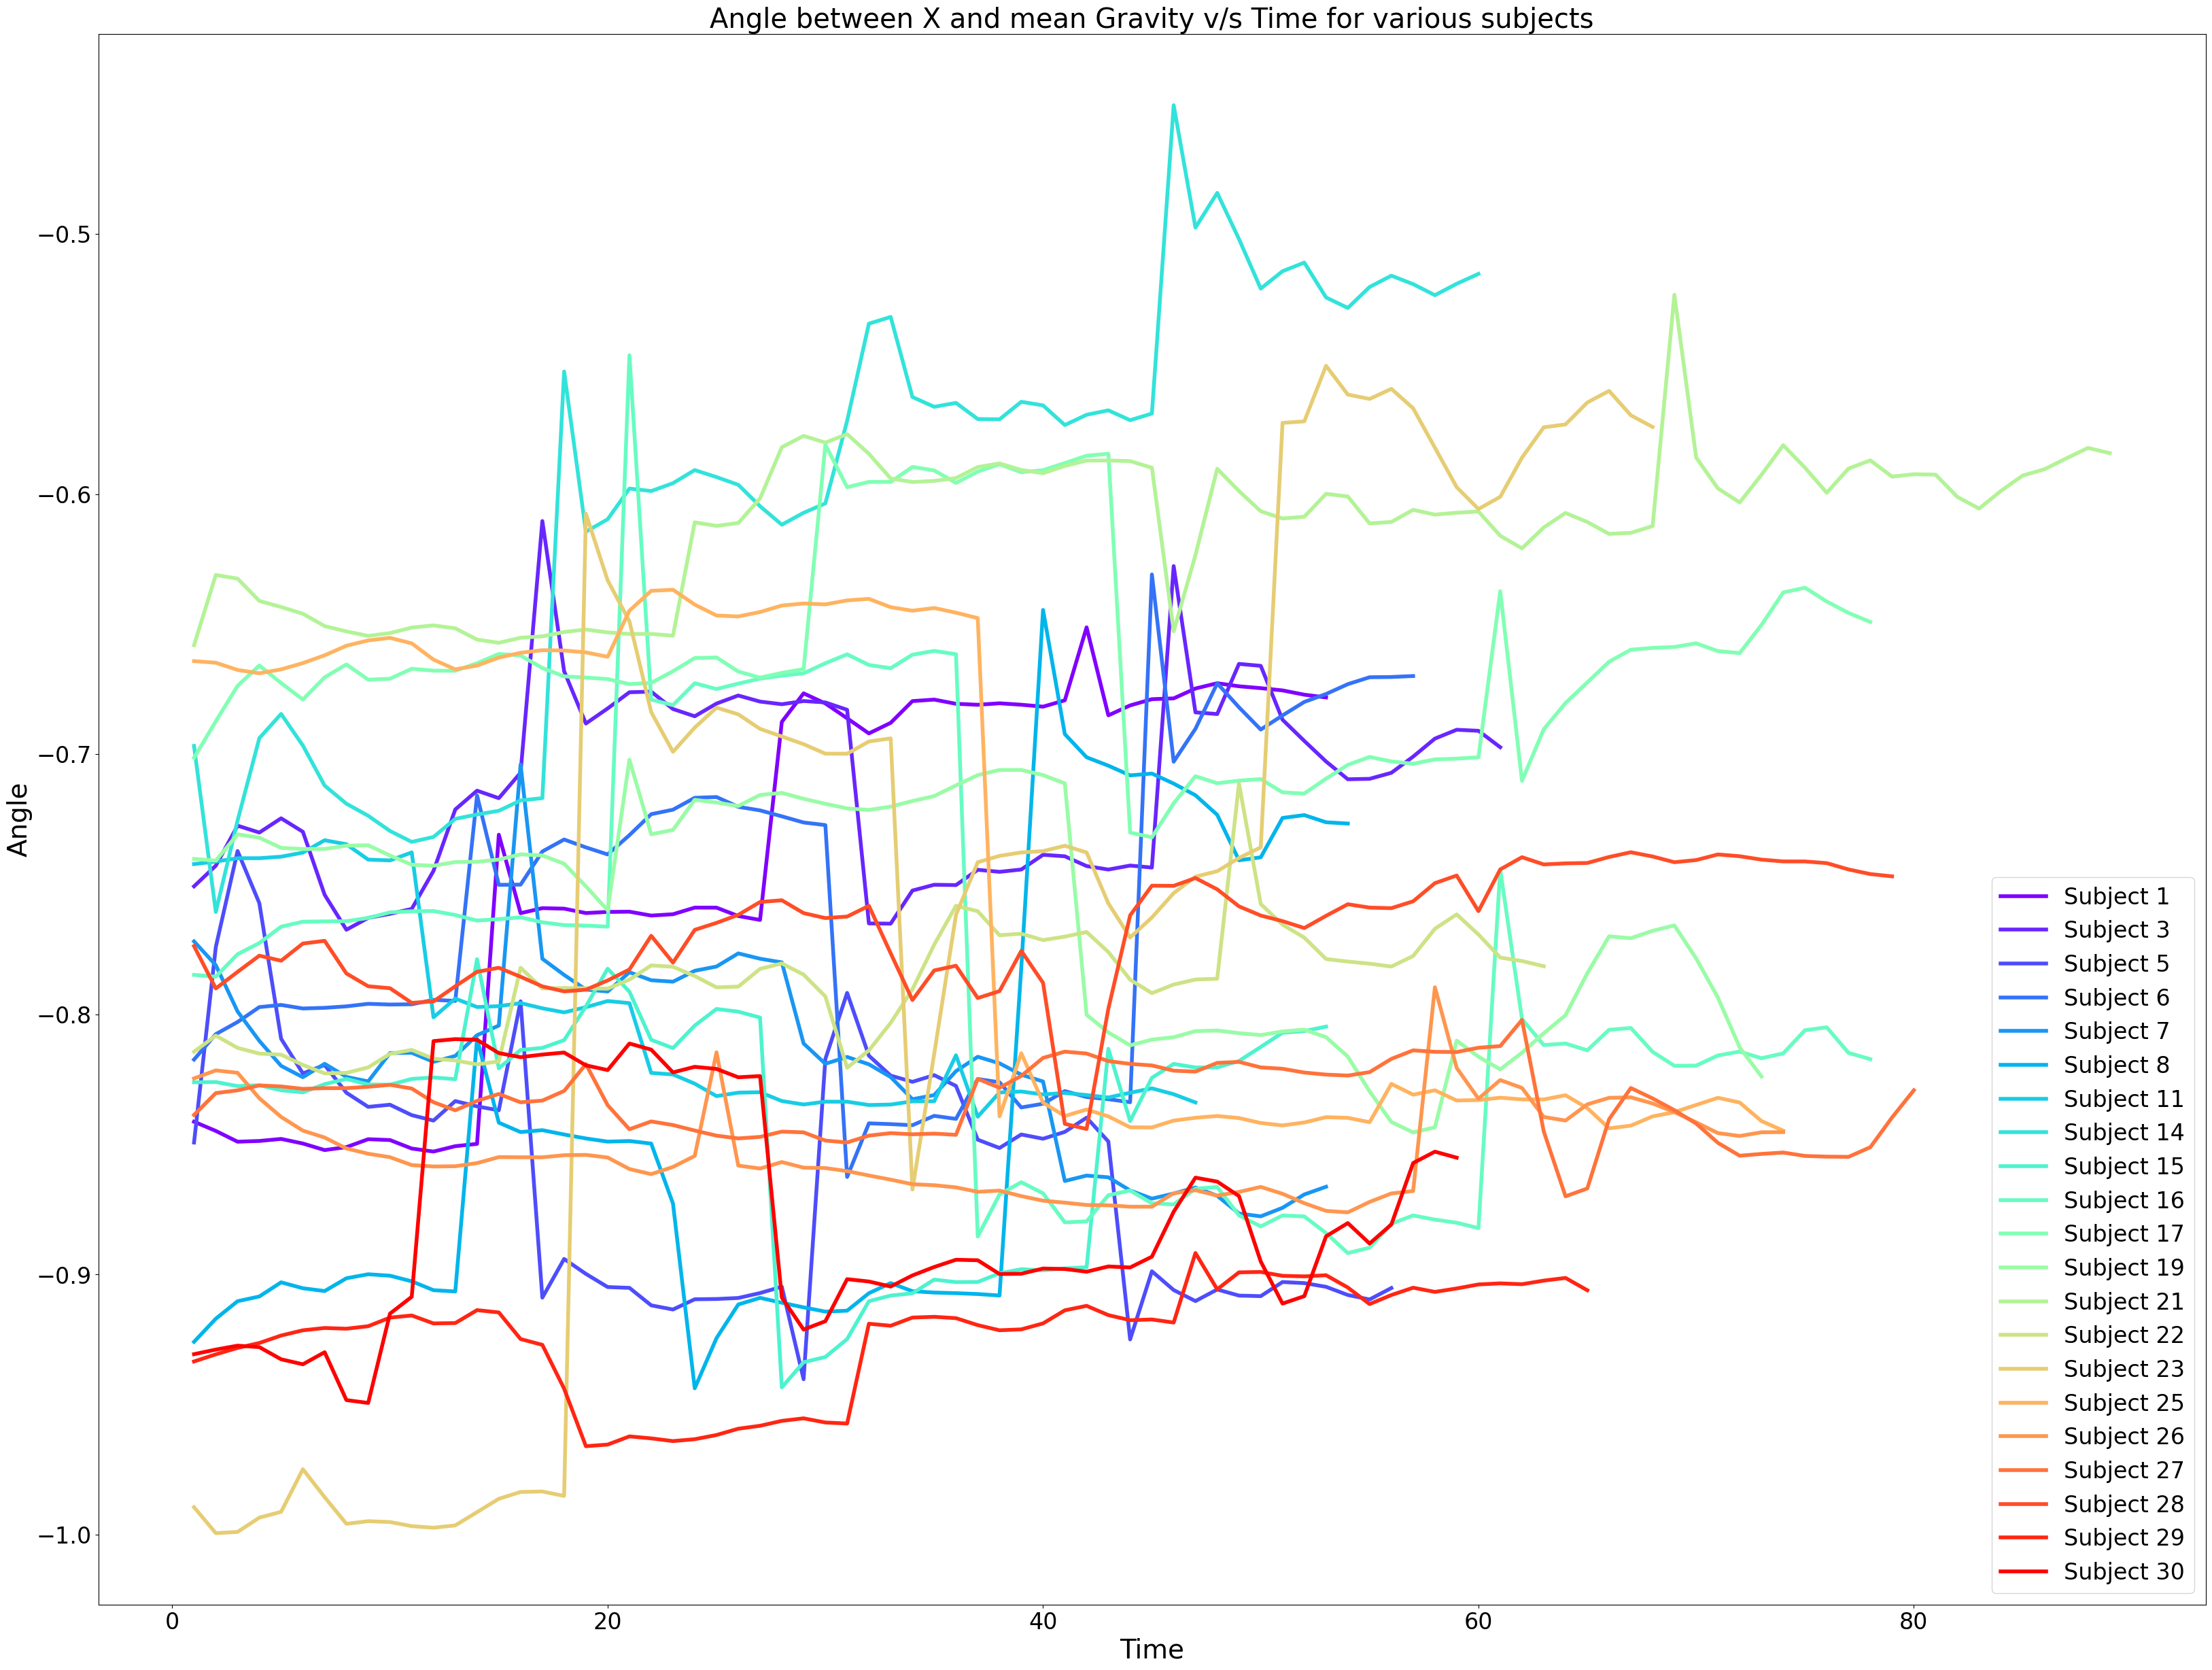

In [19]:
for row_number in range(standing_activity.shape[0]):
    if (row_number == 0 
        or standing_activity.iloc[row_number]['subject'] == standing_activity.iloc[row_number - 1]['subject']):
        time_series[index] = time
        time += 1
    else:
        time_series[index] = 1
        time = 2
    index += 1

# Combine the time_series with the standing_activity dataframe
time_series_df = pd.DataFrame({ 'Time': time_series })
standing_activity_df = pd.concat([standing_activity, time_series_df], axis = 1)

colors = cm.rainbow(np.linspace(0, 1, len(standing_activity_df['subject'].unique())))

# Create plot for each subject, which will all be displayed overlapping on one plot
id = 0
for subject in standing_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize': [40, 30], 'font.size': 24})
    plt.plot(standing_activity_df[standing_activity_df['subject'] == subject]['Time'], 
             standing_activity_df[standing_activity_df['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id], 
             label = 'Subject ' + str(subject),
             linewidth = 4)
    plt.xlabel('Time',fontsize=28)
    plt.ylabel('Angle',fontsize=28)
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 24})
    id += 1

In [ ]:
accuracy_scores = np.zeros(4)

# Support Vector Classifier
clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)